In [53]:
import pandas as pd

file_path = 'ECU_IoHT.xlsx'

try:
    df = pd.read_excel(file_path, engine='openpyxl')
except Exception as e:
    print(f"An error occurred: {e}")

***Enropy values are the same***

In [54]:
import pandas as pd
from scipy.stats import entropy
from collections import Counter

# Calculate entropy of time intervals between packets
df['Time_diff'] = df['Time'].diff().fillna(0)
time_diff_counts = Counter(df['Time_diff'])
time_diff_entropy = entropy(list(time_diff_counts.values()))

# Calculate entropy of packet lengths
length_counts = Counter(df['Length'])
length_entropy = entropy(list(length_counts.values()))

# Add entropy values as new features
df['Time_diff_entropy'] = time_diff_entropy
df['Length_entropy'] = length_entropy

In [55]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.000000,7.869433,1.281906
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.002956,7.869433,1.281906
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.197769,7.869433,1.281906
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,0.001988,7.869433,1.281906
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.208852,7.869433,1.281906
...,...,...,...,...,...,...,...,...,...,...,...,...
111202,111203,10103.029320,Alfa_97:cf:63,6e:c7:ec:3c:f2:ba,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,1.277220,7.869433,1.281906
111203,111204,10103.140580,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.111260,7.869433,1.281906
111204,111205,10103.383780,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,0.243200,7.869433,1.281906
111205,111206,10106.386960,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,3.003180,7.869433,1.281906


***Entropy values are not the same***

In [56]:
import pandas as pd
from scipy.stats import entropy
from collections import Counter

# Initialize columns for segmented entropies
df['Time_diff_segmented_entropy'] = 0.0
df['Length_segmented_entropy'] = 0.0

# Define the size of each segment
segment_size = 60

# Function to calculate entropy of a segment
def calculate_segment_entropy(column_values):
    counts = Counter(column_values)
    return entropy(list(counts.values()), base=2)  # Specifying base=2 for entropy in bits

# Calculate entropy for each segment
for start in range(0, df.shape[0], segment_size):
    end = start + segment_size
    # Ensure we don't go past the end of the DataFrame
    segment = df.iloc[start:end]
    if not segment.empty:
        time_diff_entropy = calculate_segment_entropy(segment['Time_diff'])
        length_entropy = calculate_segment_entropy(segment['Length'])
        df.loc[start:end, 'Time_diff_segmented_entropy'] = time_diff_entropy
        df.loc[start:end, 'Length_segmented_entropy'] = length_entropy

In [57]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy,Time_diff_segmented_entropy,Length_segmented_entropy
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.000000,7.869433,1.281906,4.373557,1.216319
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.002956,7.869433,1.281906,4.373557,1.216319
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.197769,7.869433,1.281906,4.373557,1.216319
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,0.001988,7.869433,1.281906,4.373557,1.216319
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.208852,7.869433,1.281906,4.373557,1.216319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111202,111203,10103.029320,Alfa_97:cf:63,6e:c7:ec:3c:f2:ba,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,1.277220,7.869433,1.281906,3.661933,2.520121
111203,111204,10103.140580,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.111260,7.869433,1.281906,3.661933,2.520121
111204,111205,10103.383780,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,0.243200,7.869433,1.281906,3.661933,2.520121
111205,111206,10106.386960,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,3.003180,7.869433,1.281906,3.661933,2.520121


Protocol
ICMP       77920
TCP        23494
TLSv1.2     5891
ARP         2359
DNS         1242
TLSv1.1      143
OCSP         126
HTTP          14
DHCP          13
UDP            4
LLC            1
Name: count, dtype: int64


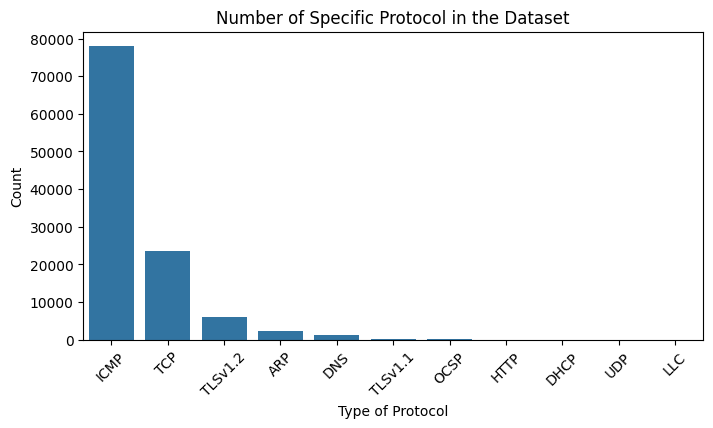

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

protocol_counts = df['Protocol'].value_counts()

print(protocol_counts)

# Plotting the counts as a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.title('Number of Specific Protocol in the Dataset')
plt.xlabel('Type of Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


Type of attack
Smurf Attack      77920
No Attack         23453
Nmap Port Scan     6836
ARP Spoofing       2359
DoS Attack          639
Name: count, dtype: int64


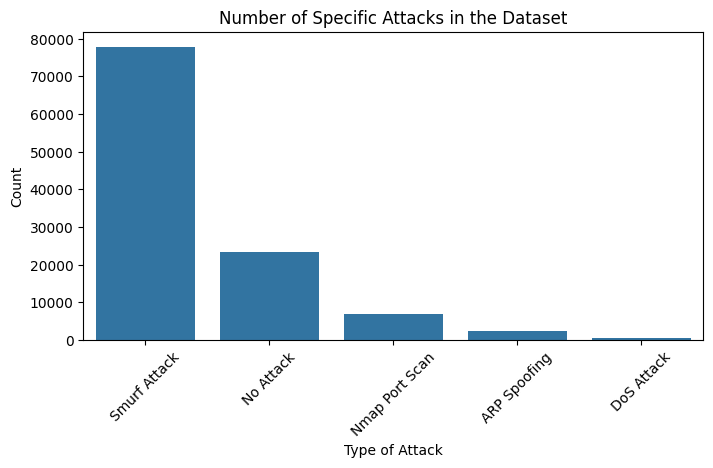

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

attack_counts = df['Type of attack'].value_counts()

print(attack_counts)

# Plotting the counts as a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.title('Number of Specific Attacks in the Dataset')
plt.xlabel('Type of Attack')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


In [60]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy,Time_diff_segmented_entropy,Length_segmented_entropy
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.000000,7.869433,1.281906,4.373557,1.216319
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.002956,7.869433,1.281906,4.373557,1.216319
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.197769,7.869433,1.281906,4.373557,1.216319
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,0.001988,7.869433,1.281906,4.373557,1.216319
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.208852,7.869433,1.281906,4.373557,1.216319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111202,111203,10103.029320,Alfa_97:cf:63,6e:c7:ec:3c:f2:ba,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,1.277220,7.869433,1.281906,3.661933,2.520121
111203,111204,10103.140580,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.111260,7.869433,1.281906,3.661933,2.520121
111204,111205,10103.383780,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,0.243200,7.869433,1.281906,3.661933,2.520121
111205,111206,10106.386960,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,3.003180,7.869433,1.281906,3.661933,2.520121


***Data preprocessing***

In [61]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy,Time_diff_segmented_entropy,Length_segmented_entropy
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.000000,7.869433,1.281906,4.373557,1.216319
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.002956,7.869433,1.281906,4.373557,1.216319
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,0.197769,7.869433,1.281906,4.373557,1.216319
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,0.001988,7.869433,1.281906,4.373557,1.216319
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.208852,7.869433,1.281906,4.373557,1.216319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111202,111203,10103.029320,Alfa_97:cf:63,6e:c7:ec:3c:f2:ba,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,1.277220,7.869433,1.281906,3.661933,2.520121
111203,111204,10103.140580,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,0.111260,7.869433,1.281906,3.661933,2.520121
111204,111205,10103.383780,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,0.243200,7.869433,1.281906,3.661933,2.520121
111205,111206,10106.386960,Alfa_97:cf:63,Broadcast,ARP,42,192.168.43.1 is at 00:c0:ca:97:cf:63 (duplicat...,Attack,ARP Spoofing,3.003180,7.869433,1.281906,3.661933,2.520121


In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

df = df.drop(df.columns[0], axis=1)
df = pd.get_dummies(df, columns=['Protocol'])
df['Type'] = pd.factorize(df['Type'])[0]
df['Type of attack'] = pd.factorize(df['Type of attack'])[0]
df = df.drop('Info', axis=1)
scaler = MinMaxScaler()
df['Time'] = scaler.fit_transform(df[['Time']])

le = LabelEncoder()
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])

scaler = MinMaxScaler()
df['Length'] = scaler.fit_transform(df[['Length']])

In [63]:
df

,Time,Source,Destination,Length,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy,Time_diff_segmented_entropy,Length_segmented_entropy,Protocol_ARP,Protocol_DHCP,Protocol_DNS,Protocol_HTTP,Protocol_ICMP,Protocol_LLC,Protocol_OCSP,Protocol_TCP,Protocol_TLSv1.1,Protocol_TLSv1.2,Protocol_UDP
0,0.000000e+00,67,69,0.000000,0,0,0.000000,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False
1,2.924014e-07,64,68,0.000000,0,0,0.002956,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False
2,1.985530e-05,67,69,0.000000,0,0,0.197769,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False
3,2.005195e-05,45,44,0.030028,1,1,0.001988,7.869433,1.281906,4.373557,1.216319,False,False,True,False,False,False,False,False,False,False,False
4,4.071116e-05,64,68,0.000000,0,0,0.208852,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111202,9.993708e-01,67,65,0.000000,0,0,1.277220,7.869433,1.281906,3.661933,2.520121,True,False,False,False,False,False,False,False,False,False,False
111203,9.993818e-01,64,68,0.000000,0,0,0.111260,7.869433,1.281906,3.661933,2.520121,True,False,False,False,False,False,False,False,False,False,False
111204,9.994058e-01,67,69,0.000000,0,0,0.243200,7.869433,1.281906,3.661933,2.520121,True,False,False,False,False,False,False,False,False,False,False
111205,9.997029e-01,67,69,0.000000,0,0,3.003180,7.869433,1.281906,3.661933,2.520121,True,False,False,False,False,False,False,False,False,False,False


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X = df[['Time', 'Source', 'Destination', 'Length', 'Time_diff', 'Time_diff_entropy', 'Length_entropy', 'Time_diff_segmented_entropy', 'Length_segmented_entropy'] + [col for col in df if col.startswith('Protocol_')]].values
y = df['Type of attack'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')


***Oversampling Minority Class***

In [65]:
# from imblearn.over_sampling import RandomOverSampler

# # Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42)

# # Resample the dataset
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

***Undersampling Majority Class***

In [66]:
# from imblearn.under_sampling import RandomUnderSampler

# # Initialize the RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)

# # Resample the dataset
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


***SMOTE (Synthetic Minority Over-sampling Technique)***

In [67]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [68]:
# Fit the classifier with resampled data
clf.fit(X_resampled, y_resampled)

# Continue with prediction and evaluation as before
y_pred = clf.predict(X_test)

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the classifier
accuracy = accuracy_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test), average='weighted')
recall = recall_score(y_test, clf.predict(X_test), average='weighted')
f1 = f1_score(y_test, clf.predict(X_test), average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision* 100:.2f}%")
print(f"Recall: {recall* 100:.2f}%")
print(f"F1-Score: {f1* 100:.2f}%")

Accuracy: 98.83%
Precision: 98.95%
Recall: 98.83%
F1-Score: 98.88%


In [70]:
pd.set_option('display.max_columns', None)
df.head()

,Time,Source,Destination,Length,Type,Type of attack,Time_diff,Time_diff_entropy,Length_entropy,Time_diff_segmented_entropy,Length_segmented_entropy,Protocol_ARP,Protocol_DHCP,Protocol_DNS,Protocol_HTTP,Protocol_ICMP,Protocol_LLC,Protocol_OCSP,Protocol_TCP,Protocol_TLSv1.1,Protocol_TLSv1.2,Protocol_UDP
0,0.000000e+00,67,69,0.000000,0,0,0.000000,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False
1,2.924014e-07,64,68,0.000000,0,0,0.002956,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False
2,1.985530e-05,67,69,0.000000,0,0,0.197769,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False
3,2.005195e-05,45,44,0.030028,1,1,0.001988,7.869433,1.281906,4.373557,1.216319,False,False,True,False,False,False,False,False,False,False,False
4,4.071116e-05,64,68,0.000000,0,0,0.208852,7.869433,1.281906,4.373557,1.216319,True,False,False,False,False,False,False,False,False,False,False


In [71]:
X[0]

array([0.0, 67, 69, 0.0, 0.0, 7.869432769386776, 1.2819062060314088,
       4.3735572622751855, 1.2163193927932734, True, False, False, False,
       False, False, False, False, False, False, False], dtype=object)

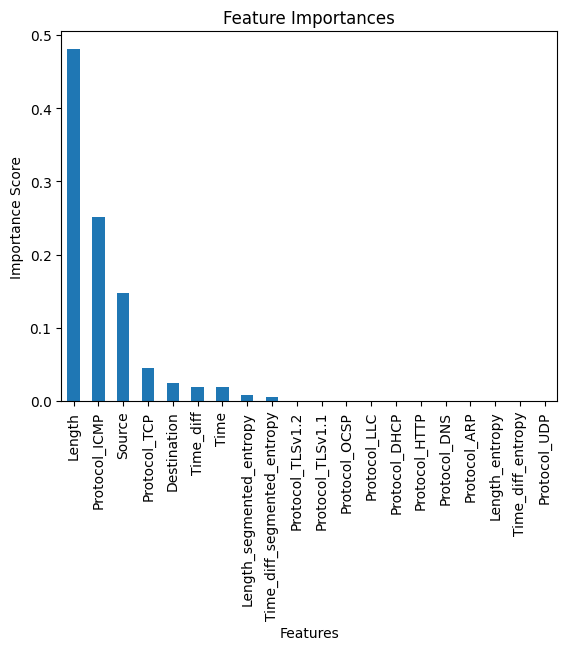

In [72]:
feature_importances = clf.feature_importances_

# features = pd.Series(feature_importances, index = ['Length',
#        'Time_diff', 'Time_diff_entropy', 'Length_entropy',
#        'Time_diff_segmented_entropy', 'Length_segmented_entropy',
#        'Protocol'])

features = pd.Series(feature_importances, index = ['Time', 'Source', 'Destination', 'Length',
       'Time_diff', 'Time_diff_entropy', 'Length_entropy',
       'Time_diff_segmented_entropy', 'Length_segmented_entropy', 'Protocol_ARP',
       'Protocol_DHCP', 'Protocol_DNS', 'Protocol_HTTP', 'Protocol_ICMP',
       'Protocol_LLC', 'Protocol_OCSP', 'Protocol_TCP', 'Protocol_TLSv1.1',
       'Protocol_TLSv1.2', 'Protocol_UDP'])

# Sort the features by importance
sorted_features = features.sort_values(ascending=False)

# Visualize the feature importances
import matplotlib.pyplot as plt
sorted_features.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()